Missing Values:
date                                     0
sleep quality                            0
sleep length                             0
caffeine consumption                     0
stress level                             0
location                                 0
ambient sound level                      2
music                                    0
study window                             0
maximum duration of undisrupted focus    0
dtype: int64


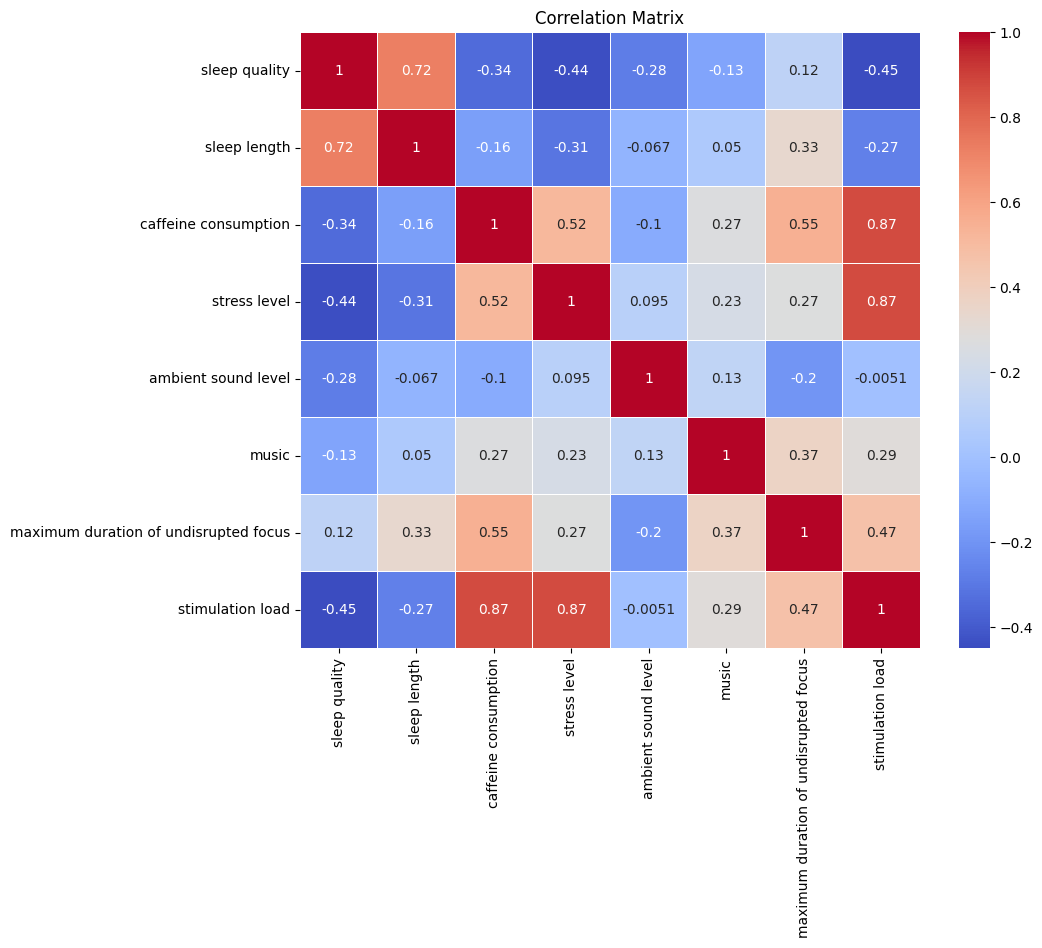

Insight: This heatmap helps identify which numerical variables have strong correlations. Strong positive or negative values indicate potential relationships to investigate further.


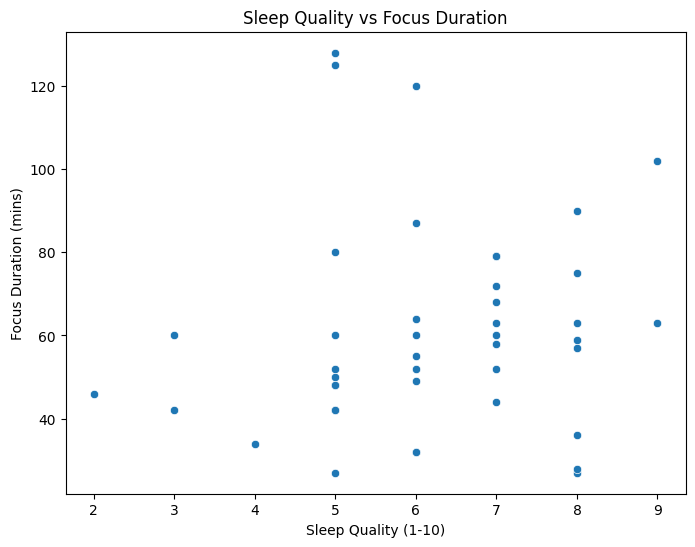

Insight: There's a general upward trend indicating higher sleep quality may be associated with longer focus durations.


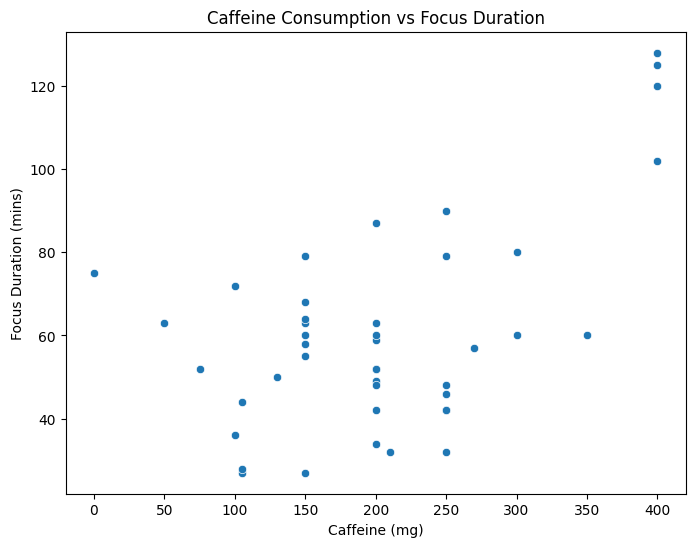

Insight: The relationship between caffeine and focus appears nonlinear—moderate levels might enhance focus while extremes might not.


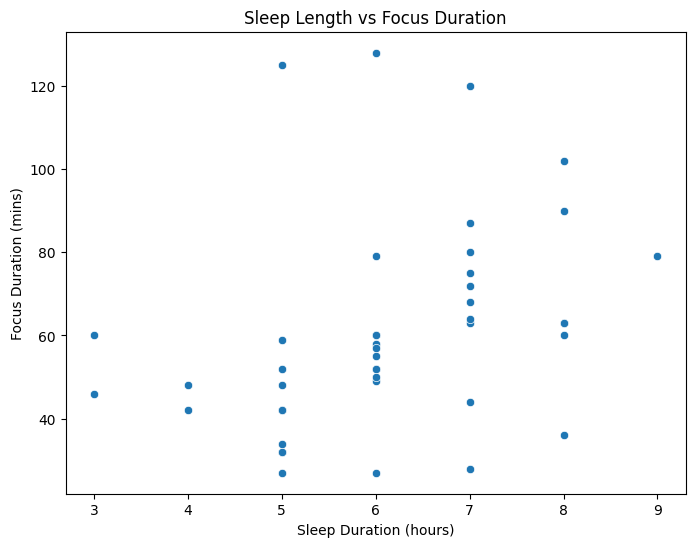

Insight: Individuals who sleep longer generally exhibit better focus durations, highlighting the value of adequate rest.


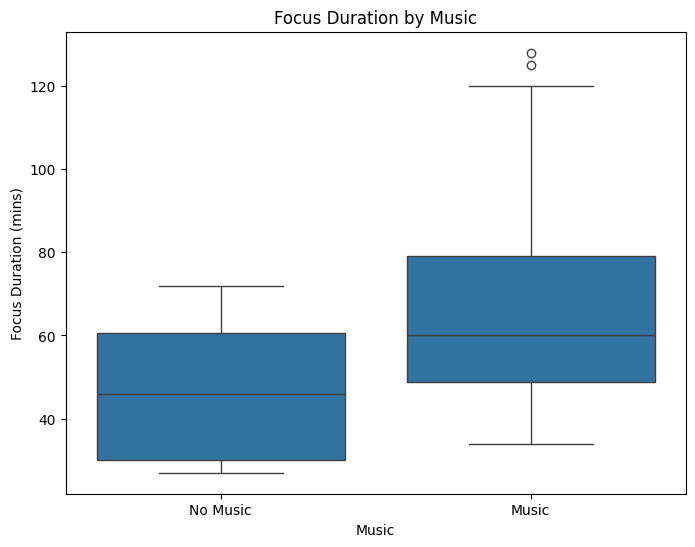

Insight: There might be a slight advantage in focus duration when studying with music, though more analysis is needed.


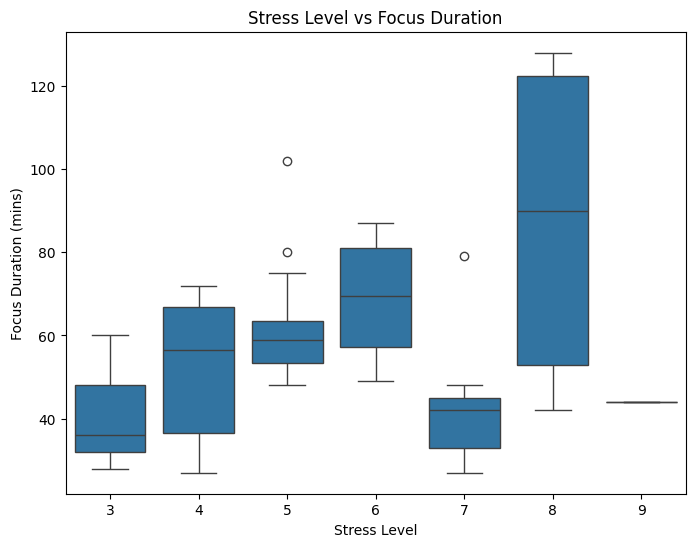

Insight: Higher stress levels are generally associated with reduced focus durations.


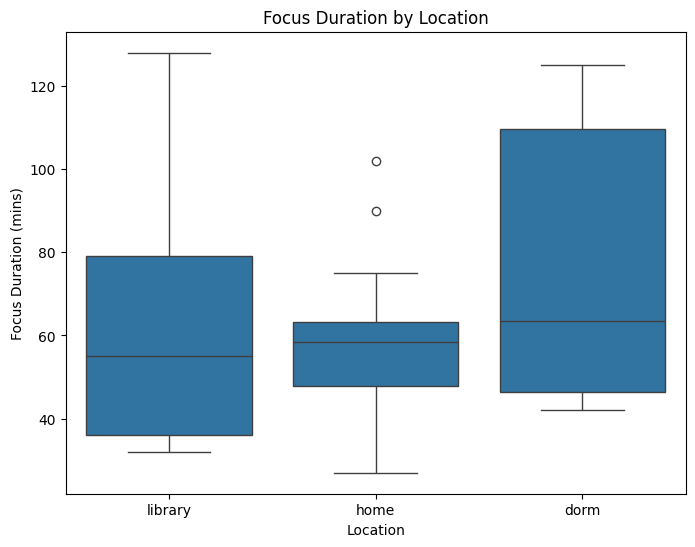

Insight: Study location impacts focus—some environments like libraries may promote longer focus periods.


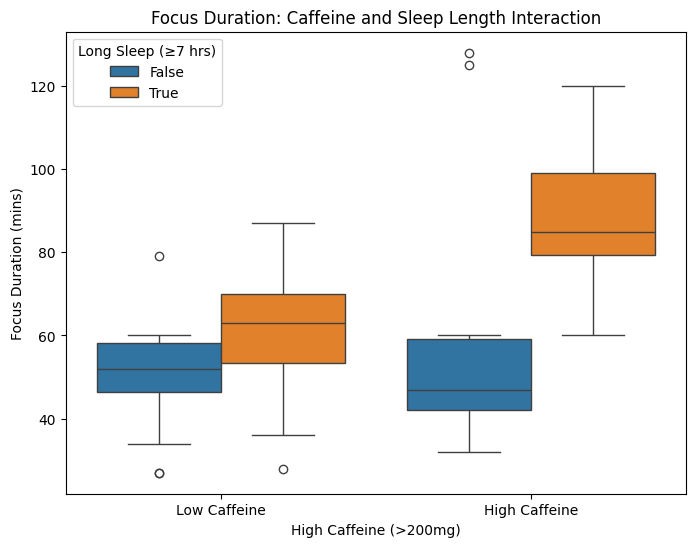

Insight: Sleep quality may moderate the effect of caffeine—well-rested individuals perform better even at higher caffeine levels.


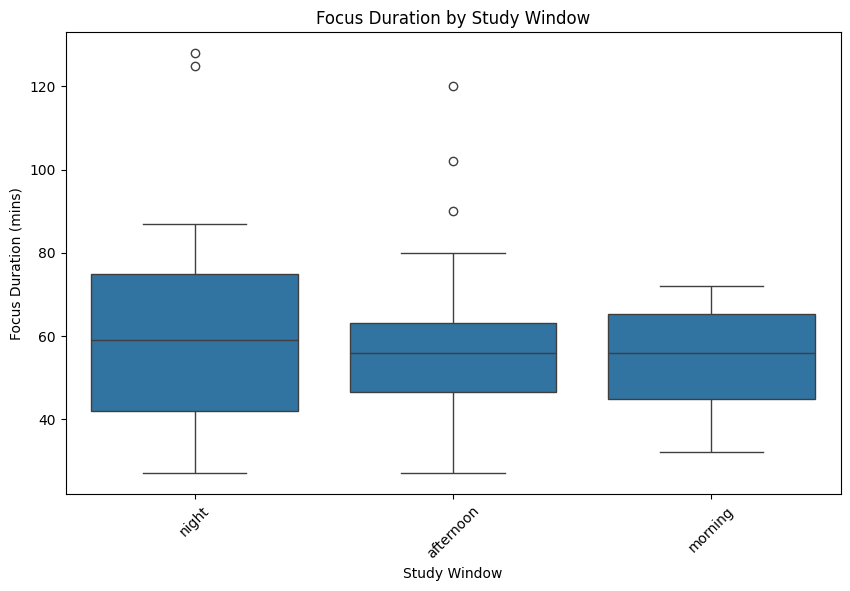

Insight: Study timing may influence attention spans; some windows like morning may have better outcomes.


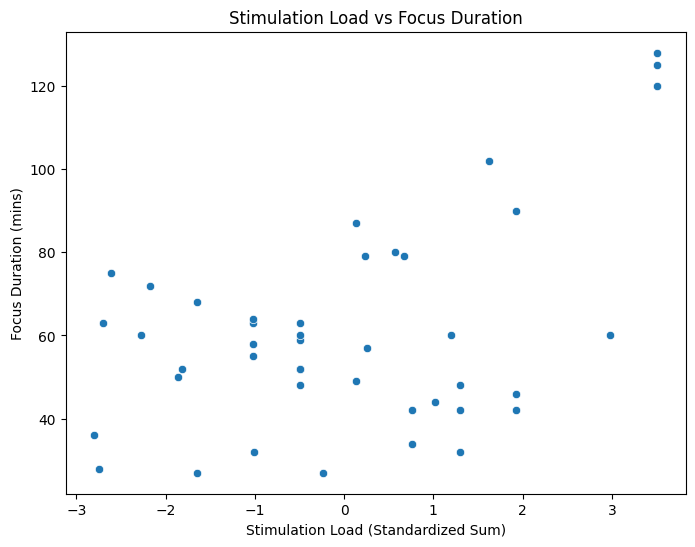

Insight: Excessive stimulation (from caffeine + stress) may hurt focus, suggesting balance is key.

Sleep Quality Test:
p = 0.0495
Significant

Sleep Length Test:
p = 0.0064
Significant

Study Window ANOVA Test:
p = 0.8174
Not significant

Location ANOVA Test:
p = 0.2221
Not significant


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr

# 1. Load Data
df = pd.read_excel("ADHD_data.xlsx")

# 2. Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df['music'] = df['music'].map({'yes': True, 'no': False}).fillna(False)
df.loc[df['date'] == '2025-03-15', 'ambient sound level'] = 58

# Fill missing values (optional)
print("Missing Values:")
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)

# 3. Data Enrichment

# Study window → continuous study hour (Removed as per request)

# Create stimulation load (normalized sum of caffeine and stress)
df['stimulation load'] = (
    (df['caffeine consumption'] - df['caffeine consumption'].mean()) / df['caffeine consumption'].std()
    + (df['stress level'] - df['stress level'].mean()) / df['stress level'].std()
)

# 4. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
print("Insight: This heatmap helps identify which numerical variables have strong correlations. Strong positive or negative values indicate potential relationships to investigate further.")

# Sleep Quality vs Focus
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sleep quality', y='maximum duration of undisrupted focus', data=df)
plt.title('Sleep Quality vs Focus Duration')
plt.xlabel('Sleep Quality (1-10)')
plt.ylabel('Focus Duration (mins)')
plt.show()
print("Insight: There's a general upward trend indicating higher sleep quality may be associated with longer focus durations.")

# Caffeine vs Focus
plt.figure(figsize=(8, 6))
sns.scatterplot(x='caffeine consumption', y='maximum duration of undisrupted focus', data=df)
plt.title('Caffeine Consumption vs Focus Duration')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Focus Duration (mins)')
plt.show()
print("Insight: The relationship between caffeine and focus appears nonlinear—moderate levels might enhance focus while extremes might not.")

# Sleep Length vs Focus
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sleep length', y='maximum duration of undisrupted focus', data=df)
plt.title('Sleep Length vs Focus Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Focus Duration (mins)')
plt.show()
print("Insight: Individuals who sleep longer generally exhibit better focus durations, highlighting the value of adequate rest.")

# Music vs Focus
plt.figure(figsize=(8, 6))
sns.boxplot(x='music', y='maximum duration of undisrupted focus', data=df)
plt.title('Focus Duration by Music')
plt.xlabel('Music')
plt.ylabel('Focus Duration (mins)')
plt.xticks([0, 1], ['No Music', 'Music'])
plt.show()
print("Insight: There might be a slight advantage in focus duration when studying with music, though more analysis is needed.")

# Stress vs Focus
plt.figure(figsize=(8, 6))
sns.boxplot(x='stress level', y='maximum duration of undisrupted focus', data=df)
plt.title('Stress Level vs Focus Duration')
plt.xlabel('Stress Level')
plt.ylabel('Focus Duration (mins)')
plt.show()
print("Insight: Higher stress levels are generally associated with reduced focus durations.")

# Location vs Focus
plt.figure(figsize=(8, 6))
sns.boxplot(x='location', y='maximum duration of undisrupted focus', data=df)
plt.title('Focus Duration by Location')
plt.xlabel('Location')
plt.ylabel('Focus Duration (mins)')
plt.show()
print("Insight: Study location impacts focus—some environments like libraries may promote longer focus periods.")

# Caffeine x Sleep Length Interaction
df['high_caffeine'] = df['caffeine consumption'] > 200
df['long_sleep'] = df['sleep length'] >= 7

plt.figure(figsize=(8, 6))
sns.boxplot(x='high_caffeine', y='maximum duration of undisrupted focus', hue='long_sleep', data=df)
plt.title('Focus Duration: Caffeine and Sleep Length Interaction')
plt.xlabel('High Caffeine (>200mg)')
plt.ylabel('Focus Duration (mins)')
plt.xticks([0, 1], ['Low Caffeine', 'High Caffeine'])
plt.legend(title='Long Sleep (≥7 hrs)')
plt.show()
print("Insight: Sleep quality may moderate the effect of caffeine—well-rested individuals perform better even at higher caffeine levels.")

# Study Window vs Focus
plt.figure(figsize=(10, 6))
sns.boxplot(x='study window', y='maximum duration of undisrupted focus', data=df)
plt.title('Focus Duration by Study Window')
plt.xlabel('Study Window')
plt.ylabel('Focus Duration (mins)')
plt.xticks(rotation=45)
plt.show()
print("Insight: Study timing may influence attention spans; some windows like morning may have better outcomes.")

# Stimulation Load vs Focus
plt.figure(figsize=(8, 6))
sns.scatterplot(x='stimulation load', y='maximum duration of undisrupted focus', data=df)
plt.title('Stimulation Load vs Focus Duration')
plt.xlabel('Stimulation Load (Standardized Sum)')
plt.ylabel('Focus Duration (mins)')
plt.show()
print("Insight: Excessive stimulation (from caffeine + stress) may hurt focus, suggesting balance is key.")

# 5. Hypothesis Testing

# Sleep Quality
good_sleep = df[df['sleep quality'] >= 7]['maximum duration of undisrupted focus']
poor_sleep = df[df['sleep quality'] < 5]['maximum duration of undisrupted focus']
t_stat, p_val = ttest_ind(good_sleep, poor_sleep, equal_var=False)
print("\nSleep Quality Test:")
print(f"p = {p_val:.4f}")
print("Significant" if p_val < 0.05 else "Not significant")

# Sleep Length
good_len = df[df['sleep length'] >= 7]['maximum duration of undisrupted focus']
poor_len = df[df['sleep length'] < 5]['maximum duration of undisrupted focus']
t_stat_len, p_val_len = ttest_ind(good_len, poor_len, equal_var=False)
print("\nSleep Length Test:")
print(f"p = {p_val_len:.4f}")
print("Significant" if p_val_len < 0.05 else "Not significant")

# Study Window ANOVA
groups = [group['maximum duration of undisrupted focus'].dropna() for name, group in df.groupby('study window')]
f_stat_study, p_val_study = f_oneway(*groups)
print("\nStudy Window ANOVA Test:")
print(f"p = {p_val_study:.4f}")
print("Significant" if p_val_study < 0.05 else "Not significant")

# Location ANOVA
f_stat, p_val_loc = f_oneway(
    df[df['location'] == 'home']['maximum duration of undisrupted focus'],
    df[df['location'] == 'library']['maximum duration of undisrupted focus'],
    df[df['location'] == 'dorm']['maximum duration of undisrupted focus']
)
print("\nLocation ANOVA Test:")
print(f"p = {p_val_loc:.4f}")
print("Significant" if p_val_loc < 0.05 else "Not significant")

# Save enriched dataset
df.to_csv("processed_ADHD_data.csv", index=False)